# Simple Linear Regression on Salary Dataset - Kaggle
link: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

### Getting dataset

In [2]:
!kaggle datasets download abhishek14398/salary-dataset-simple-linear-regression -p ./datasets

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
  0%|                                                 | 0.00/457 [00:00<?, ?B/s]
100%|███████████████████████████████████████████| 457/457 [00:00<00:00, 976kB/s]


In [4]:
!unzip ./datasets/salary-dataset-simple-linear-regression.zip -d ./datasets

Archive:  ./datasets/salary-dataset-simple-linear-regression.zip
  inflating: ./datasets/Salary_dataset.csv  


### Visualize data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [3]:
path = "./datasets/Salary_dataset.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
#drop useless column
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [5]:
#get into lists
years_experience = df['YearsExperience'].to_list()
salary = df['Salary'].to_list()
years_experience, salary

([1.2000000000000002,
  1.4,
  1.6,
  2.1,
  2.3000000000000003,
  3.0,
  3.1,
  3.3000000000000003,
  3.3000000000000003,
  3.8,
  4.0,
  4.1,
  4.1,
  4.199999999999999,
  4.6,
  5.0,
  5.199999999999999,
  5.4,
  6.0,
  6.1,
  6.9,
  7.199999999999999,
  8.0,
  8.299999999999999,
  8.799999999999999,
  9.1,
  9.6,
  9.7,
  10.4,
  10.6],
 [39344.0,
  46206.0,
  37732.0,
  43526.0,
  39892.0,
  56643.0,
  60151.0,
  54446.0,
  64446.0,
  57190.0,
  63219.0,
  55795.0,
  56958.0,
  57082.0,
  61112.0,
  67939.0,
  66030.0,
  83089.0,
  81364.0,
  93941.0,
  91739.0,
  98274.0,
  101303.0,
  113813.0,
  109432.0,
  105583.0,
  116970.0,
  112636.0,
  122392.0,
  121873.0])

In [6]:
#tensors
X = torch.tensor(years_experience, dtype=torch.float32).unsqueeze(1)
Y = torch.tensor(salary, dtype=torch.float32).unsqueeze(1)

# train and test splits
split = int(0.8 * (len(X)))


X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

X_train, Y_train, X_test, Y_test

(tensor([[1.2000],
         [1.4000],
         [1.6000],
         [2.1000],
         [2.3000],
         [3.0000],
         [3.1000],
         [3.3000],
         [3.3000],
         [3.8000],
         [4.0000],
         [4.1000],
         [4.1000],
         [4.2000],
         [4.6000],
         [5.0000],
         [5.2000],
         [5.4000],
         [6.0000],
         [6.1000],
         [6.9000],
         [7.2000],
         [8.0000],
         [8.3000]]),
 tensor([[ 39344.],
         [ 46206.],
         [ 37732.],
         [ 43526.],
         [ 39892.],
         [ 56643.],
         [ 60151.],
         [ 54446.],
         [ 64446.],
         [ 57190.],
         [ 63219.],
         [ 55795.],
         [ 56958.],
         [ 57082.],
         [ 61112.],
         [ 67939.],
         [ 66030.],
         [ 83089.],
         [ 81364.],
         [ 93941.],
         [ 91739.],
         [ 98274.],
         [101303.],
         [113813.]]),
 tensor([[ 8.8000],
         [ 9.1000],
         [ 9.6000],


In [7]:
#visualize

def plot_predictions(X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, predictions=None):
    plt.title("Years of Experience and Salary Regression")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary ($)")

    plt.scatter(X_train, Y_train, c='green', label="train")
    plt.scatter(X_test, Y_test, c='blue', label="test")

    if predictions is not None:
        plt.scatter(X_test, predictions, c='red', label="predictions")
    

    plt.legend()

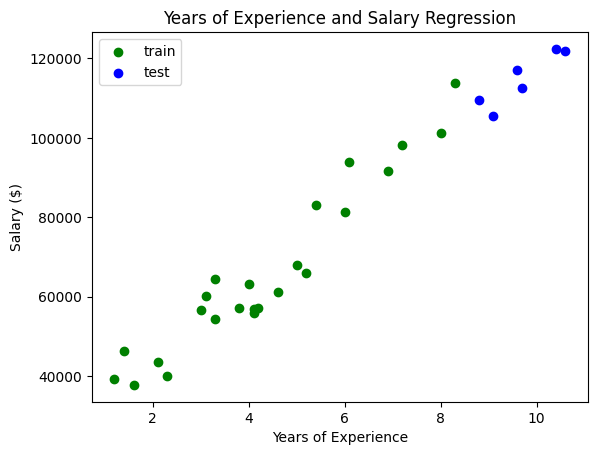

In [8]:
plot_predictions()

In [9]:
#create model
from torch import nn

class SalaryRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(in_features=1, out_features=1, bias=True)
    
    def forward(self, x):
        return self.hidden(x)


In [10]:
seed = 42
torch.manual_seed(seed)

regression_model = SalaryRegModel()
regression_model.state_dict()

OrderedDict([('hidden.weight', tensor([[0.7645]])),
             ('hidden.bias', tensor([0.8300]))])

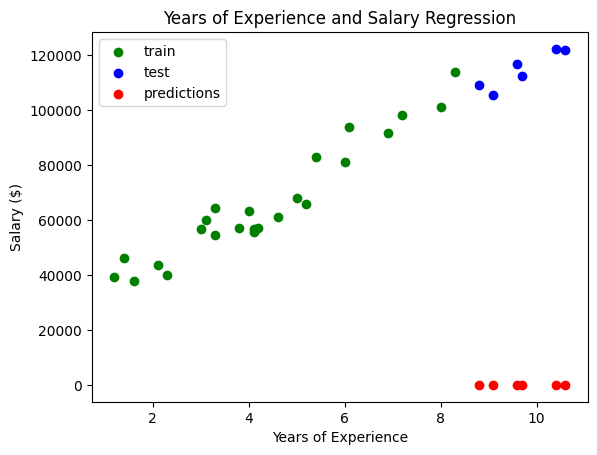

In [11]:
#Test inital predictions
with torch.inference_mode():
    preds = regression_model(X_test)
    plot_predictions(predictions=preds)

In [13]:
#training + test loop

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=regression_model.parameters(), lr=1e-2)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [14]:
EPOCHS = 1001

train_loss_values = []
epoch_count = []

for epoch in range(EPOCHS):
    predictions = regression_model(X_train)
    loss = loss_fn(predictions, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_loss_values.append(loss.detach().numpy())
    epoch_count.append(epoch)

<function matplotlib.pyplot.show(close=None, block=None)>

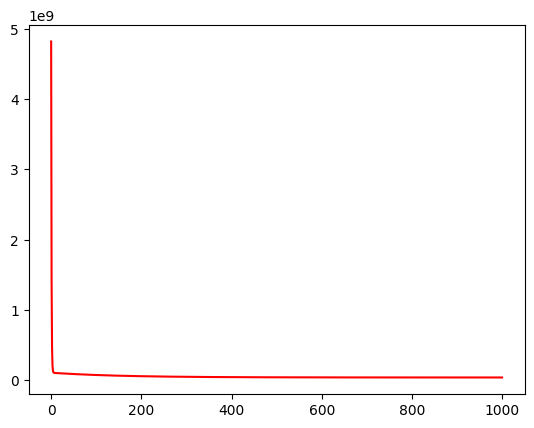

In [18]:
plt.plot(epoch_count, train_loss_values, c='red')
plt.show

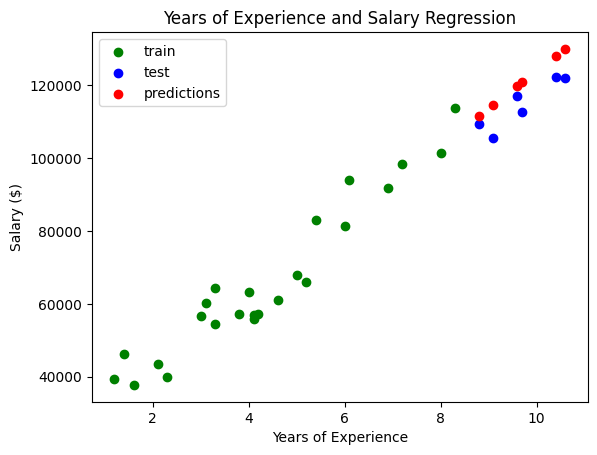

In [19]:
with torch.inference_mode():
    y_preds = regression_model(X_test)
    plot_predictions(predictions=y_preds)

In [20]:
def inference(years_exp: int) -> int:
    with torch.inference_mode():
        years_exp = torch.tensor([years_exp], dtype=torch.float32)
        projected_salary = regression_model(years_exp)
        return int(projected_salary[0])


In [75]:
print(regression_model.hidden.weight)
print(regression_model.hidden.bias)

Parameter containing:
tensor([[10193.7295]], requires_grad=True)
Parameter containing:
tensor([21922.8516], requires_grad=True)


In [71]:
linear = nn.Linear(in_features=2, out_features=3)

In [72]:
print(linear.weight.shape) #stores a matrix of shape [out_features, in_features]
print(linear.bias.shape) #stores matrix of shape [out_features]
linear.weight

torch.Size([3, 2])
torch.Size([3])


Parameter containing:
tensor([[-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260]], requires_grad=True)

In [73]:
X = torch.tensor([[2, 1], [3, 4], [10, 13]], dtype=torch.float)
X, X.shape

(tensor([[ 2.,  1.],
         [ 3.,  4.],
         [10., 13.]]),
 torch.Size([3, 2]))

In [74]:
weights = linear.weight
y1 = torch.matmul(X, weights.T) + linear.bias
y2 = linear(X)
y3 = torch.matmul(weights, X.T).T + linear.bias
print(y1)
print(y2)
print(y3)

tensor([[-0.9342, -0.5305, -1.3756],
        [-1.5087,  0.5895, -2.9117],
        [-4.5356,  2.8008, -9.7527]], grad_fn=<AddBackward0>)
tensor([[-0.9342, -0.5305, -1.3756],
        [-1.5087,  0.5895, -2.9117],
        [-4.5356,  2.8008, -9.7527]], grad_fn=<AddmmBackward0>)
tensor([[-0.9342, -0.5305, -1.3756],
        [-1.5087,  0.5895, -2.9117],
        [-4.5356,  2.8008, -9.7527]], grad_fn=<AddBackward0>)
